# Wrangling Data @dog_rates aka. WeRateDogs

# Introduction
Real-world data rarely come clean. Using Python and its libraries, we will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. We will document our wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python its libraries.

The dataset that we will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user [@dog_rates](https://twitter.com/dog_rates), also known as [WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs). WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs, Brent". WeRateDogs has over 4 million followers and has received international media coverage.

**Software that we will be used**  
Since we work in a local environment, the following libraries should be installed:
* pandas
* NumPy
* requests
* tweepy
* json

**Context**  
Goal: wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. 

**The Data**  
* Enhanced Twitter Archive
>The WeRateDogs Twitter archive contains basic tweet data for all 2356 of their tweets. Containing one column the archive does contain though: each tweet's text, which Udacity team has extracted the rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced".

* Additional Data via the Twitter API
>Then we need retweet count and favorite count are two of the notable column omissions. Fortunately, this additional data can be gathered by anyone from Twitter's API. Using this API we can extract needed data to make our dataset more concise.

* Image Predictions File
> The Udacity team has run every image in the WeRateDogs Twitter archive through a neural network that can classify breeds of dogs. The results are so amazing: a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction.


**Project Details** 

* Data wrangling, which consists of:
> Gathering data    
> Assessing data  
> Cleaning data
* Storing, analyzing, and visualizing your wrangled data
* Reporting on:
> 1) your data wrangling efforts and   
> 2) your data analyses and visualizations

## Gather Data

* The WeRateDogs Twitter archive.
> The archive data is downloaded manually from the Udacity lesson's page, then we will be inserted using Pandas libraries.
* The tweet image predictions.
> This data is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv.
* Each tweet's retweet count and favorite ("like") count at minimum, and any additional data may be interesting.
> For this data we will be using TwitterAPI and Tweepy library. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.

---

As usual, we need to import useful packages before doing anything in this project.

In [1]:
import re
import json
import tweepy
import requests
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
from io import BytesIO
from tweepy import OAuthHandler
import matplotlib.pyplot as plt
from timeit import default_timer as timer

### WeRateDogs Twitter archive

This was data in our hand right now.

In [2]:
archive_df = pd.read_csv('twitter-archive-enhanced.csv')
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


### The tweet image predictions.

The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically.

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

r = requests.get(url)  
with open('image-predictions.tsv', 'wb') as f:
    f.write(r.content)
    
image_df = pd.read_csv('image-predictions.tsv', sep='\t')
image_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


### Tweet's retweet count and favorite ("like") count at minimum, and any additional data may be interesting.

Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API keys, secrets, and tokens in your project submission.

In [4]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = archive_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Fail
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293: 8

Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success
550: 805207613751304193
Success


Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807: 772102971039580160
Success
808

Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
1062: 741303864243200000
Success
10

Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
1311: 707038192327901184
Success
13

Success
1531: 690021994562220032
Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
1560: 688547210804498433
Success
15

Success
1780: 677716515794329600
Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
18

Success
2029: 671866342182637568
Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
20

Success
2278: 667437278097252352
Success
2279: 667435689202614272
Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
23

In [4]:
tweepy_df = pd.read_json("tweet_json.txt", lines=True)
tweepy_df

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2317,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2318,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2319,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2320,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


---

## Assessing Data
In this step, we will be assessing them visually and programmatically for quality and tidiness issues using two types of assessment. We will be intensively using Pandas and its method, i.e:
* `.describe()` to see the summary statistic
* `.info()` to see the data types each column and detect missing data
* `.duplicates()` to see if there is any duplicated row
* we also using some loops to see the weird rating on the archive dataframe


**Key Points**  
Key points in the data wrangling process for this project:

* We want original ratings (no retweets) that have images. 
* Cleaning includes merging individual pieces of data according to the rules of tidy data.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.


###  Archive Dataframe

In [5]:
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [6]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [7]:
archive_df.loc[archive_df['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [8]:
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [9]:
# check numerator value counts
archive_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [10]:
# check single numerator text value
single_numerator = archive_df.rating_numerator.value_counts().index[-22:]

single_numerator_index = []
for s in single_numerator:
    row = archive_df.index[archive_df['rating_numerator'] == s].to_list()
    single_numerator_index.append(row[0])

for s in single_numerator_index:
    print(s, "\t", archive_df['text'][s], "\t",
          archive_df['rating_numerator'][s])

1254 	 Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12 	 80
1663 	 I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible 	 20
516 	 Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx 	 24
1712 	 Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD 	 26
1433 	 Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ 	 44
1202 	 This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq 	 50
1351 	 Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa 	 60
902 	 Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE 	 165
433 	 Th

In [11]:
# check rating_denominator value counts
archive_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [12]:
# check single denominator text value

single_denominator = archive_df.rating_denominator.value_counts().index[5:]

single_denominator_index = []
for s in single_denominator:
    row = archive_df.index[archive_df['rating_denominator'] == s].to_list()
    single_denominator_index.append(row[0])

for s in single_denominator_index:
    print(s, "\t", archive_df['text'][s], "\t",
          archive_df['rating_denominator'][s])

2335 	 This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv 	 2
1663 	 I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible 	 16
1433 	 Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ 	 40
433 	 The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd 	 70
342 	 @docmisterio account started on 11/15/15 	 15
1228 	 Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1 	 90
1635 	 Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55 	 110
1779 	 IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq 	 120
1634 	 Two sneaky puppers were not initially seen, moving the rating to 143/130. Please 

In [13]:
archive_df[archive_df.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Image Dataframe

In [14]:
image_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [15]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
image_df[image_df.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1903,851953902622658560,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True


### Tweepy Dataframe

In [17]:
tweepy_df

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2317,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2318,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2319,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2320,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [18]:
tweepy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2322 entries, 0 to 2321
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2322 non-null   datetime64[ns, UTC]
 1   id                             2322 non-null   int64              
 2   id_str                         2322 non-null   int64              
 3   full_text                      2322 non-null   object             
 4   truncated                      2322 non-null   bool               
 5   display_text_range             2322 non-null   object             
 6   entities                       2322 non-null   object             
 7   extended_entities              2050 non-null   object             
 8   source                         2322 non-null   object             
 9   in_reply_to_status_id          76 non-null     float64            
 10  in_reply_to_status_id_st

In [19]:
tweepy_df['retweeted_status'].value_counts()

{'created_at': 'Sat Jul 15 02:44:07 +0000 2017', 'id': 886053734421102592, 'id_str': '886053734421102592', 'full_text': '12/10 #BATP https://t.co/WxwJmvjfxo', 'truncated': False, 'display_text_range': [0, 11], 'entities': {'hashtags': [{'text': 'BATP', 'indices': [6, 11]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/WxwJmvjfxo', 'expanded_url': 'https://twitter.com/dog_rates/status/886053434075471873', 'display_url': 'twitter.com/dog_rates/stat…', 'indices': [12, 35]}]}, 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 19607400, 'id_str': '19607400', 'name': 'Oakland A's', 'screen_name': 'Athletics', 'location': 'Oakland, CA', 'description': 'Official Twitter of the nine-time World Series champion Athletics | #RootedInOakland | Instagram: @athletics | Snapcha

From the assessment process above, the result is divide into two kinds, quality and tidiness issues.

### Quality
Quality: issues with content. Low-quality data is also known as dirty data.

#### `archive` dataframe:
* keep the original tweet except the retweeted
* some not useful columns for analysis i.e: in_reply_to_status_id, in_reply_to_user_id, source, expanded_urls, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp
* tweet_id in int64 Dtype
* timestamp in object Dtype
* wrong numerator (decimal value or false detection) in index 516, 1712, 1202, and 763
* wrong denominator in index 2335, 342, and 516
* 'None' value instead of NaN in name and dog stages colummn


#### `image` dataframe:
* duplicated image
* tweet_id in int64 Dtype
* not columns for analysis for analysis

#### `tweepy` dataframe:
* non original tweet
* id column name is not match with other dataframe
* id in int64 Dtype  
* not useful columns for analysis i.e (id_str, in_reply_to_status_id, in_reply_to_status_id_str, in_reply_to_user_id, in_reply_to_user_id_str, lang, quoted_status_id, and quoted_status_id_str

### Tidiness
Tidiness: issues with a structure that prevents easy analysis. Untidy data is also known as messy data.

#### `archive` dataframe
* dog_stage columns: doggo, floofer, pupper, and puppo is not good

#### `image` dataframe:
* p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog

#### `tweepy` dataframe:
-

#### make all dataframes into one whole master dataframe

## Cleaning Data

The programmatic data cleaning process:

* Define
* Code
* Test

As always, we need to copy our dataframe before do any cleaning process, so we can refer back to the old ones.

### Archive Dataframe

What we will do for this dataframe are:
* remove retweeted row with filtering technique
* remove not useful for analysis columns using `.drop()` method
* change tweet_id datatype into 'object' using `.astype()` method
* change timestamp datatype into datetime using `.astype()` method
* with some looping we will fix
    * numerator for index 516, 1712, 1202, and 763
    * wrong denominator for index 2335, 342, and 516
* change 'None' into NaN in name and dog stages colummn using numpy 
* make dog_stage column, then delete the messy columns

In [20]:
# Prepare, copy the original dataframe
archive_df_clean = archive_df.copy()

In [21]:
# Remove not useful columns
list = ['in_reply_to_status_id',
        'in_reply_to_user_id', 'source', 'expanded_urls']
archive_df_clean.drop(list, axis=1, inplace=True)

archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   timestamp                   2356 non-null   object 
 2   text                        2356 non-null   object 
 3   retweeted_status_id         181 non-null    float64
 4   retweeted_status_user_id    181 non-null    float64
 5   retweeted_status_timestamp  181 non-null    object 
 6   rating_numerator            2356 non-null   int64  
 7   rating_denominator          2356 non-null   int64  
 8   name                        2356 non-null   object 
 9   doggo                       2356 non-null   object 
 10  floofer                     2356 non-null   object 
 11  pupper                      2356 non-null   object 
 12  puppo                       2356 non-null   object 
dtypes: float64(2), int64(3), object(8

#### Keep the original tweet

Based on .info() there is 181 row that which is not original tweet

In [22]:
# Select only the row that has null value in retweeted_status_id column
archive_df_clean = archive_df_clean[archive_df_clean['retweeted_status_id'].isnull()]

archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   timestamp                   2175 non-null   object 
 2   text                        2175 non-null   object 
 3   retweeted_status_id         0 non-null      float64
 4   retweeted_status_user_id    0 non-null      float64
 5   retweeted_status_timestamp  0 non-null      object 
 6   rating_numerator            2175 non-null   int64  
 7   rating_denominator          2175 non-null   int64  
 8   name                        2175 non-null   object 
 9   doggo                       2175 non-null   object 
 10  floofer                     2175 non-null   object 
 11  pupper                      2175 non-null   object 
 12  puppo                       2175 non-null   object 
dtypes: float64(2), int64(3), object(8

In [23]:
# Remove unused retweeted columns
list = ['retweeted_status_id', 'retweeted_status_user_id',
        'retweeted_status_timestamp']
archive_df_clean.drop(list, axis=1, inplace=True)

archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   text                2175 non-null   object
 3   rating_numerator    2175 non-null   int64 
 4   rating_denominator  2175 non-null   int64 
 5   name                2175 non-null   object
 6   doggo               2175 non-null   object
 7   floofer             2175 non-null   object
 8   pupper              2175 non-null   object
 9   puppo               2175 non-null   object
dtypes: int64(3), object(7)
memory usage: 186.9+ KB


#### Fix columns dtype (tweet_id, timestamp)

In [24]:
# Fix the wrong dtype using .astype
dict = {'tweet_id': 'object', 'timestamp': 'datetime64[ns]'}
archive_df_clean = archive_df_clean.astype(dict)
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2175 non-null   object        
 1   timestamp           2175 non-null   datetime64[ns]
 2   text                2175 non-null   object        
 3   rating_numerator    2175 non-null   int64         
 4   rating_denominator  2175 non-null   int64         
 5   name                2175 non-null   object        
 6   doggo               2175 non-null   object        
 7   floofer             2175 non-null   object        
 8   pupper              2175 non-null   object        
 9   puppo               2175 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 186.9+ KB


#### Fix wrong numerator and denominator

If we match the numerator and denominator column value with text column, there is some mismatch like wrong detection or not detected decimal value.

##### Wrong detection

In [25]:
wrong_detection_index = [516, 1202, 2335, 342]
for s in wrong_detection_index:
    print(s, "\t", archive_df['text'][s],
          "\t", archive_df['rating_numerator'][s],
          "\t", archive_df['rating_denominator'][s])

516 	 Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx 	 24 	 7
1202 	 This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq 	 50 	 50
2335 	 This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv 	 1 	 2
342 	 @docmisterio account started on 11/15/15 	 11 	 15


In [26]:
# Index 516, change num and denum to NaN
archive_df_clean.loc[516, 'rating_numerator'] = np.NaN
archive_df_clean.loc[516, 'rating_denominator'] = np.NaN

In [27]:
# Index 1202, change num to 11 and denum to 10
archive_df_clean.loc[1202, 'rating_numerator'] = 11
archive_df_clean.loc[1202, 'rating_denominator'] = 10

In [28]:
# Index 2335, change num to 9 and denum to 10
archive_df_clean.loc[2335, 'rating_numerator'] = 9
archive_df_clean.loc[2335, 'rating_denominator'] = 10

In [29]:
# Index 342, change num  and denum to NaN
archive_df_clean.loc[342, 'rating_numerator'] = np.NaN
archive_df_clean.loc[342, 'rating_denominator'] = np.NaN

##### Decimal value

The decimal numerator is like in index 1712 and 763. Then we have to suspect something else like this, so we do a re-assessment data.

In [30]:
decimal_detection_index = [763, 1712]
for s in decimal_detection_index:
    print(s, "\t", archive_df['text'][s],
          "\t", archive_df_clean['rating_numerator'][s],
          "\t", archive_df_clean['rating_denominator'][s])

763 	 This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq 	 27.0 	 10.0
1712 	 Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD 	 26.0 	 10.0


In [31]:
# Check all decimal occasion
for s in archive_df_clean.index.to_list():
    text = archive_df_clean['text'][s]
    regexp = re.compile(r'(\d+\.\d*\/\d+)')
    if regexp.search(text):
        print(s, "\t", archive_df['text'][s],
          "\t", archive_df_clean['rating_numerator'][s],
          "\t", archive_df_clean['rating_denominator'][s])

45 	 This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948 	 5.0 	 10.0
695 	 This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS 	 75.0 	 10.0
763 	 This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq 	 27.0 	 10.0
1689 	 I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace 	 5.0 	 10.0
1712 	 Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD 	 26.0 	 10.0


In [32]:
# Index 45, change num  to 13.5
archive_df_clean.loc[45, 'rating_numerator'] = 13.5

In [33]:
# Index 695, change num  to 9.75
archive_df_clean.loc[695, 'rating_numerator'] = 9.75

In [34]:
# Index 1689, change num  to 9.5
archive_df_clean.loc[1689, 'rating_numerator'] = 9.5

In [35]:
# Index 1712, change num  to 11.26
archive_df_clean.loc[1712, 'rating_numerator'] = 11.26

#### Change None value in name column to NaN

In [36]:
archive_df_clean['name'] = archive_df_clean['name'].replace('None', np.NaN)
archive_df_clean.sample(10)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1575,687476254459715584,2016-01-14 03:28:06,This is Curtis. He's a fluffball. 11/10 would ...,11.0,10.0,Curtis,None,None,pupper,None
30,886267009285017600,2017-07-15 16:51:35,@NonWhiteHat @MayhewMayhem omg hello tanner yo...,12.0,10.0,NaN,None,None,None,None
33,885984800019947520,2017-07-14 22:10:11,Viewer discretion advised. This is Jimbo. He w...,12.0,10.0,Jimbo,None,None,None,None
1104,735137028879360001,2016-05-24 15:55:00,Meet Buckley. His family &amp; some neighbors ...,9.0,10.0,Buckley,None,None,pupper,None
693,786963064373534720,2016-10-14 16:13:10,This is Rory. He's got an interview in a few m...,12.0,10.0,Rory,None,None,None,None
2296,667090893657276420,2015-11-18 21:23:57,This is Clybe. He is an Anemone Valdez. One ea...,7.0,10.0,Clybe,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,None,None,None,None
1839,675891555769696257,2015-12-13 04:14:39,This is Donny. He's summoning the demon monste...,6.0,10.0,Donny,None,None,None,None
1951,673686845050527744,2015-12-07 02:13:55,This is George. He's upset that the 4th of Jul...,11.0,10.0,George,None,None,None,None
276,840632337062862849,2017-03-11 18:35:42,Say hello to Maddie and Gunner. They are consi...,12.0,10.0,Maddie,None,None,None,None


#### Dog_stage columns

In [37]:
archive_df_clean['dog_stage'] = archive_df_clean['text'].str.extract('(doggo|floofer|pupper|puppo)', expand=True)

archive_df_clean.sample(10)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
1687,681579835668455424,2015-12-28 20:57:50,This is Apollo. He thought you weren't coming ...,8.0,10.0,Apollo,None,None,None,None,NaN
670,789986466051088384,2016-10-23 00:27:05,This is Happy. He's a bathtub reviewer. Seems ...,12.0,10.0,Happy,None,None,None,None,NaN
2058,671347597085433856,2015-11-30 15:18:34,This is Lola. She was not fully prepared for t...,9.0,10.0,Lola,None,None,None,None,NaN
1920,674265582246694913,2015-12-08 16:33:36,This is Henry. He's a shit dog. Short pointy e...,2.0,10.0,Henry,None,None,None,None,NaN
668,790277117346975746,2016-10-23 19:42:02,This is Bruce. He never backs down from a chal...,11.0,10.0,Bruce,None,None,None,None,NaN
114,870656317836468226,2017-06-02 15:00:16,This is Cody. He zoomed too aggressively and t...,13.0,10.0,Cody,None,None,None,None,NaN
715,783839966405230592,2016-10-06 01:23:05,This is Riley. His owner put a donut pillow ar...,13.0,10.0,Riley,None,None,None,None,NaN
355,830956169170665475,2017-02-13 01:46:03,Say hello to Reggie. He hates puns. 12/10 ligh...,12.0,10.0,Reggie,None,None,None,None,NaN
1996,672591762242805761,2015-12-04 01:42:26,This is Taz. He boxes leaves. 10/10 https://t....,10.0,10.0,Taz,None,None,None,None,NaN
1661,683030066213818368,2016-01-01 21:00:32,This is Lulu. She's contemplating all her unre...,10.0,10.0,Lulu,None,None,None,None,NaN


In [38]:
archive_df_clean.dog_stage = archive_df_clean.dog_stage.astype('category')
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2175 non-null   object        
 1   timestamp           2175 non-null   datetime64[ns]
 2   text                2175 non-null   object        
 3   rating_numerator    2173 non-null   float64       
 4   rating_denominator  2173 non-null   float64       
 5   name                1495 non-null   object        
 6   doggo               2175 non-null   object        
 7   floofer             2175 non-null   object        
 8   pupper              2175 non-null   object        
 9   puppo               2175 non-null   object        
 10  dog_stage           364 non-null    category      
dtypes: category(1), datetime64[ns](1), float64(2), object(7)
memory usage: 269.2+ KB


In [39]:
# Drop doggo, floofer, pupper, puppo column
stages = ['doggo', 'floofer', 'pupper', 'puppo']
archive_df_clean.drop(stages, axis=1, inplace=True)
archive_df_clean.sample(10)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage
780,775733305207554048,2016-09-13 16:30:07,This is Anakin. He strives to reach his full d...,11.0,10.0,Anakin,doggo
540,806542213899489280,2016-12-07 16:53:43,This is Waffles. He's concerned that the dandr...,11.0,10.0,Waffles,NaN
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,NaN
82,876838120628539392,2017-06-19 16:24:33,This is Ginger. She's having a ruff Monday. To...,12.0,10.0,Ginger,pupper
1132,728760639972315136,2016-05-07 01:37:30,"When you're way too slow for the ""down low"" po...",13.0,10.0,NaN,NaN
1544,689517482558820352,2016-01-19 18:39:13,This is Carl. He just wants to make sure you'r...,12.0,10.0,Carl,NaN
953,751830394383790080,2016-07-09 17:28:29,This is Tucker. He's very camera shy. 12/10 wo...,12.0,10.0,Tucker,NaN
693,786963064373534720,2016-10-14 16:13:10,This is Rory. He's got an interview in a few m...,12.0,10.0,Rory,NaN
1218,714957620017307648,2016-03-29 23:29:14,This is Curtis. He's an Albino Haberdasher. Te...,10.0,10.0,Curtis,NaN
192,855818117272018944,2017-04-22 16:18:34,I HEARD HE TIED HIS OWN BOWTIE MARK AND HE JUS...,13.0,10.0,NaN,NaN


In [40]:
archive_df_clean.reset_index(drop=True, inplace=True)
archive_df_clean

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,NaN
...,...,...,...,...,...,...,...
2170,666049248165822465,2015-11-16 00:24:50,Here we have a 1949 1st generation vulpix. Enj...,5.0,10.0,NaN,NaN
2171,666044226329800704,2015-11-16 00:04:52,This is a purebred Piers Morgan. Loves to Netf...,6.0,10.0,a,NaN
2172,666033412701032449,2015-11-15 23:21:54,Here is a very happy pup. Big fan of well-main...,9.0,10.0,a,NaN
2173,666029285002620928,2015-11-15 23:05:30,This is a western brown Mitsubishi terrier. Up...,7.0,10.0,a,NaN


### Image Dataframe

What we will do for this dataframe are:
* remo duplicated image row
* change tweet_id in into object datatype
* remove all not useful columns for analysis for analysis
* select one of p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog

In [41]:
image_df_clean = image_df.copy()
image_df_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


#### Fix tweet_id column dtype

In [42]:
image_df_clean.tweet_id = image_df_clean.tweet_id.astype('object')
image_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### Remove duplicated jpg_url

From the assessment, we found that there is 66 row with duplicated jpg_url.

In [43]:
image_df_clean[image_df_clean.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1903,851953902622658560,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True


In [44]:
# Drop the duplicated
image_df_clean.drop_duplicates(subset='jpg_url', keep='first', inplace=True)

image_df_clean[image_df_clean.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


#### Prediction columns

Make new columns for p, p_conf, and p_dog only, based on prediction.

In [45]:
# Make iteration with if function to determine dog type and p_conf score,
# based on boolean value in p1, p2, or p3
dog_type = []
p_conf = []

for idx, col in image_df_clean.iterrows():
    p1_dog = col[5]
    p2_dog = col[8]
    p3_dog = col[11]
    
    if p1_dog:
        dog_type.append(col[3])
        p_conf.append(col[4])
    elif p3_dog:
        dog_type.append(col[6])
        p_conf.append(col[7])
    elif p3_dog:
        dog_type.append(col[9])
        p_conf.append(col[10])
    else:
        dog_type.append(np.NaN)
        p_conf.append(np.NaN)

# Make new column for image dataframe
image_df_clean['dog_type'] = dog_type
image_df_clean['p_conf'] = p_conf
image_df_clean.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type,p_conf
212,670037189829525505,https://pbs.twimg.com/media/CUxzQ-nWIAAgJUm.jpg,1,pot,0.273767,False,tray,0.092888,False,doormat,0.050728,False,NaN,NaN
315,671735591348891648,https://pbs.twimg.com/media/CVJ79MzW4AEpTom.jpg,2,stone_wall,0.271121,False,Irish_wolfhound,0.063078,True,poncho,0.048226,False,NaN,NaN
193,669571471778410496,https://pbs.twimg.com/media/CUrLsI-UsAALfUL.jpg,1,minivan,0.873488,False,pickup,0.041259,False,beach_wagon,0.015400,False,NaN,NaN
1998,875144289856114688,https://pbs.twimg.com/ext_tw_video_thumb/87514...,1,Siberian_husky,0.245048,True,Pembroke,0.223716,True,dingo,0.160753,False,Siberian_husky,0.245048
486,675497103322386432,https://pbs.twimg.com/media/CV_ZAhcUkAUeKtZ.jpg,1,vizsla,0.519589,True,miniature_pinscher,0.064771,True,Rhodesian_ridgeback,0.061491,True,vizsla,0.519589
1058,714957620017307648,https://pbs.twimg.com/media/CewKKiOWwAIe3pR.jpg,1,Great_Pyrenees,0.251516,True,Samoyed,0.139346,True,kuvasz,0.129005,True,Great_Pyrenees,0.251516
1187,739485634323156992,https://pbs.twimg.com/media/CkMuP7SWkAAD-2R.jpg,2,Walker_hound,0.640256,True,English_foxhound,0.229799,True,beagle,0.037754,True,Walker_hound,0.640256
152,668645506898350081,https://pbs.twimg.com/media/CUeBiqgXAAARLbj.jpg,1,ski_mask,0.302854,False,knee_pad,0.096881,False,balance_beam,0.084076,False,NaN,NaN
1383,765669560888528897,https://pbs.twimg.com/media/CqA0XcYWAAAzltT.jpg,1,beagle,0.993333,True,Walker_hound,0.002902,True,basset,0.002415,True,beagle,0.993333
1461,778286810187399168,https://pbs.twimg.com/media/Cs0HuUTWcAUpSE8.jpg,1,Boston_bull,0.322070,True,pug,0.229903,True,muzzle,0.101420,False,Boston_bull,0.322070


In [46]:
# Remove not useful for analysis columns
columns = image_df_clean.columns[2:-2].to_list()
image_df_clean.drop(columns, axis=1, inplace=True)
image_df_clean

,tweet_id,jpg_url,dog_type,p_conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311
...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,NaN,NaN
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581


In [47]:
image_df_clean.dog_type = image_df_clean.dog_type.astype('category')
image_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   tweet_id  2009 non-null   object  
 1   jpg_url   2009 non-null   object  
 2   dog_type  1638 non-null   category
 3   p_conf    1638 non-null   float64 
dtypes: category(1), float64(1), object(2)
memory usage: 73.0+ KB


In [48]:
image_df_clean.reset_index(drop=True, inplace=True)
image_df_clean

,tweet_id,jpg_url,dog_type,p_conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311
...,...,...,...,...
2004,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712
2005,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,NaN,NaN
2006,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012
2007,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581


### Tweepy Dataframe

What we will do for this dataframe are:
* remove non original tweet
* change id column name to tweet_id then change the datatype to 'object'
* remove not useful columns for analysis i.e (id_str, in_reply_to_status_id, in_reply_to_status_id_str, in_reply_to_user_id, in_reply_to_user_id_str, lang, quoted_status_id, and quoted_status_id_str

In [49]:
# Copy the original dataframe first
tweepy_df_clean = tweepy_df.copy()
tweepy_df_clean.sample(10)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
1378,2016-02-15 01:05:02+00:00,699036661657767936,699036661657767936,HAPPY V-DAY FROM YOUR FAV PUPPER SQUAD 13/10 f...,False,"[0, 76]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 699036651171897344, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1151,2016-04-10 01:20:33+00:00,718971898235854848,718971898235854848,This is Sadie. She is prepared for battle. 10/...,False,"[0, 72]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 718971861124521984, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
617,2016-10-31 22:00:04+00:00,793210959003287553,793210959003287552,This is Maude. She's the h*ckin happiest wasp ...,False,"[0, 92]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 793210952363732998, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1673,2015-12-26 19:43:36+00:00,680836378243002368,680836378243002368,This is Ellie. She's secretly ferocious. 12/10...,False,"[0, 89]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 680836369753739264, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
989,2016-06-25 17:31:25+00:00,746757706116112384,746757706116112384,This is Maddie. She gets some wicked air time....,False,"[0, 104]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1828,2015-12-12 01:12:54+00:00,675483430902214656,675483430902214656,Rare shielded battle dog here. Very happy abou...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 675483424052801536, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
675,2016-10-12 15:55:59+00:00,786233965241827333,786233965241827328,This is Mattie. She's extremely dangerous. Wil...,False,"[0, 117]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 786233954131144704, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1404,2016-02-10 03:05:46+00:00,697255105972801536,697255105972801536,Meet Charlie. He likes to kiss all the big mil...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 697255089266933760, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
625,2016-10-31 00:20:11+00:00,792883833364439040,792883833364439040,This is Bailey. She's rather h*ckin hype for H...,False,"[0, 100]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 792883812854292481, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
842,2016-08-05 16:28:54+00:00,761599872357261312,761599872357261312,"This is Sephie. According to this picture, she...",False,"[0, 114]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 761599864782348294, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [50]:
tweepy_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2322 entries, 0 to 2321
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2322 non-null   datetime64[ns, UTC]
 1   id                             2322 non-null   int64              
 2   id_str                         2322 non-null   int64              
 3   full_text                      2322 non-null   object             
 4   truncated                      2322 non-null   bool               
 5   display_text_range             2322 non-null   object             
 6   entities                       2322 non-null   object             
 7   extended_entities              2050 non-null   object             
 8   source                         2322 non-null   object             
 9   in_reply_to_status_id          76 non-null     float64            
 10  in_reply_to_status_id_st

#### Select only useful columns

In [51]:
tweepy_df_clean = tweepy_df_clean[['id', 'retweet_count', 'favorite_count']]
tweepy_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2322 entries, 0 to 2321
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2322 non-null   int64
 1   retweet_count   2322 non-null   int64
 2   favorite_count  2322 non-null   int64
dtypes: int64(3)
memory usage: 54.5 KB


#### Fix id column, rename and change dtype to object

In [52]:
tweepy_df_clean = tweepy_df_clean.rename({'id': 'tweet_id'}, axis=1)
tweepy_df_clean.tweet_id = tweepy_df_clean.tweet_id.astype('object')
tweepy_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2322 entries, 0 to 2321
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2322 non-null   object
 1   retweet_count   2322 non-null   int64 
 2   favorite_count  2322 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.5+ KB


In [53]:
tweepy_df_clean

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7604,35884
1,892177421306343426,5631,30943
2,891815181378084864,3726,23295
3,891689557279858688,7773,39140
4,891327558926688256,8378,37390
...,...,...,...
2317,666049248165822465,40,96
2318,666044226329800704,130,269
2319,666033412701032449,41,111
2320,666029285002620928,42,120


### Join and Store All Three Dataframes
All dataframe will be merged based on tweet_id as the primary key. The final dataframe will be inner-joined.
Then, after final checking, we will save the dataframe to CSV file, named 'twitter_archive_master.csv'.

In [54]:
twitter_archive_master = archive_df_clean.merge(image_df_clean,on='tweet_id').merge(tweepy_df_clean,on='tweet_id')
twitter_archive_master.reset_index(drop=True, inplace=True)
twitter_archive_master

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,dog_type,p_conf,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,NaN,7604,35884
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,5631,30943
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,3726,23295
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,NaN,NaN,7773,39140
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,8378,37390
...,...,...,...,...,...,...,...,...,...,...,...,...
1974,666049248165822465,2015-11-16 00:24:50,Here we have a 1949 1st generation vulpix. Enj...,5.0,10.0,NaN,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,40,96
1975,666044226329800704,2015-11-16 00:04:52,This is a purebred Piers Morgan. Loves to Netf...,6.0,10.0,a,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,130,269
1976,666033412701032449,2015-11-15 23:21:54,Here is a very happy pup. Big fan of well-main...,9.0,10.0,a,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,41,111
1977,666029285002620928,2015-11-15 23:05:30,This is a western brown Mitsubishi terrier. Up...,7.0,10.0,a,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,42,120


In [55]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1979 entries, 0 to 1978
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1979 non-null   object        
 1   timestamp           1979 non-null   datetime64[ns]
 2   text                1979 non-null   object        
 3   rating_numerator    1978 non-null   float64       
 4   rating_denominator  1978 non-null   float64       
 5   name                1436 non-null   object        
 6   dog_stage           320 non-null    category      
 7   jpg_url             1979 non-null   object        
 8   dog_type            1619 non-null   category      
 9   p_conf              1619 non-null   float64       
 10  retweet_count       1979 non-null   int64         
 11  favorite_count      1979 non-null   int64         
dtypes: category(2), datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 167.0+ KB


In [56]:
# Save complete dataframe into CSV file
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

# Analysis and Visualization

In [57]:
twitter_archive_master

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,dog_type,p_conf,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,NaN,7604,35884
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,5631,30943
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,3726,23295
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,NaN,NaN,7773,39140
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,8378,37390
...,...,...,...,...,...,...,...,...,...,...,...,...
1974,666049248165822465,2015-11-16 00:24:50,Here we have a 1949 1st generation vulpix. Enj...,5.0,10.0,NaN,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,40,96
1975,666044226329800704,2015-11-16 00:04:52,This is a purebred Piers Morgan. Loves to Netf...,6.0,10.0,a,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,130,269
1976,666033412701032449,2015-11-15 23:21:54,Here is a very happy pup. Big fan of well-main...,9.0,10.0,a,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,41,111
1977,666029285002620928,2015-11-15 23:05:30,This is a western brown Mitsubishi terrier. Up...,7.0,10.0,a,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,42,120


### Most common name for dog

In [58]:
twitter_archive_master.name.value_counts()

a          55
Charlie    10
Oliver     10
Cooper     10
Tucker      9
           ..
Bubba       1
Kenzie      1
Lizzie      1
Dewey       1
Gordon      1
Name: name, Length: 930, dtype: int64

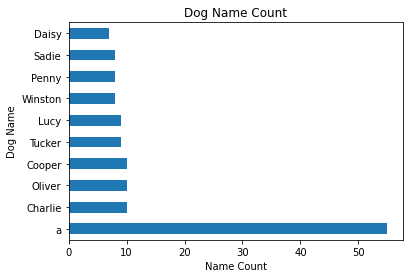

In [59]:
twitter_archive_master.name.value_counts().head(10).plot(kind='barh')
plt.title('Dog Name Count')
plt.xlabel('Name Count')
plt.ylabel('Dog Name');

In [60]:
named_a = twitter_archive_master.index[twitter_archive_master.name == 'a']

for s in named_a:
    print(s, "\t", twitter_archive_master['text'][s])

49 	 Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af 
(IG: puffie_the_chow) https://t.co/ghXBIIeQZF
462 	 Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq
571 	 Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn
734 	 This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW
736 	 Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R
745 	 This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2
771 	 This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately http

> Dogs has varies name given by it's owner. This is kind of interesting, from the detection, people tends not to share their dog name to the WeRateDogs users. Usually people only share only it's stage or type in the Twitter.

> For the most common name for dog posted is Oliver, Cooper, and Charlie, each with count 10.

### Most common dog_type

In [61]:
twitter_archive_master.dog_type.value_counts()

golden_retriever      147
Labrador_retriever     98
Pembroke               93
Chihuahua              84
pug                    55
                     ... 
Japanese_spaniel        1
loggerhead              1
maillot                 1
mink                    1
wood_rabbit             1
Name: dog_type, Length: 164, dtype: int64

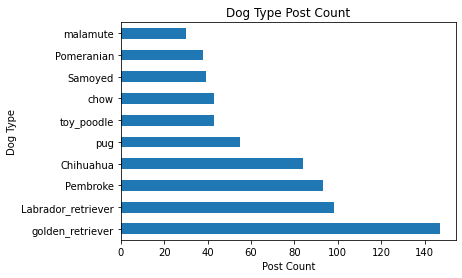

In [62]:
twitter_archive_master.dog_type.value_counts().head(10).plot(kind='barh')
plt.title('Dog Type Post Count')
plt.xlabel('Post Count')
plt.ylabel('Dog Type');

One of the most popular dog


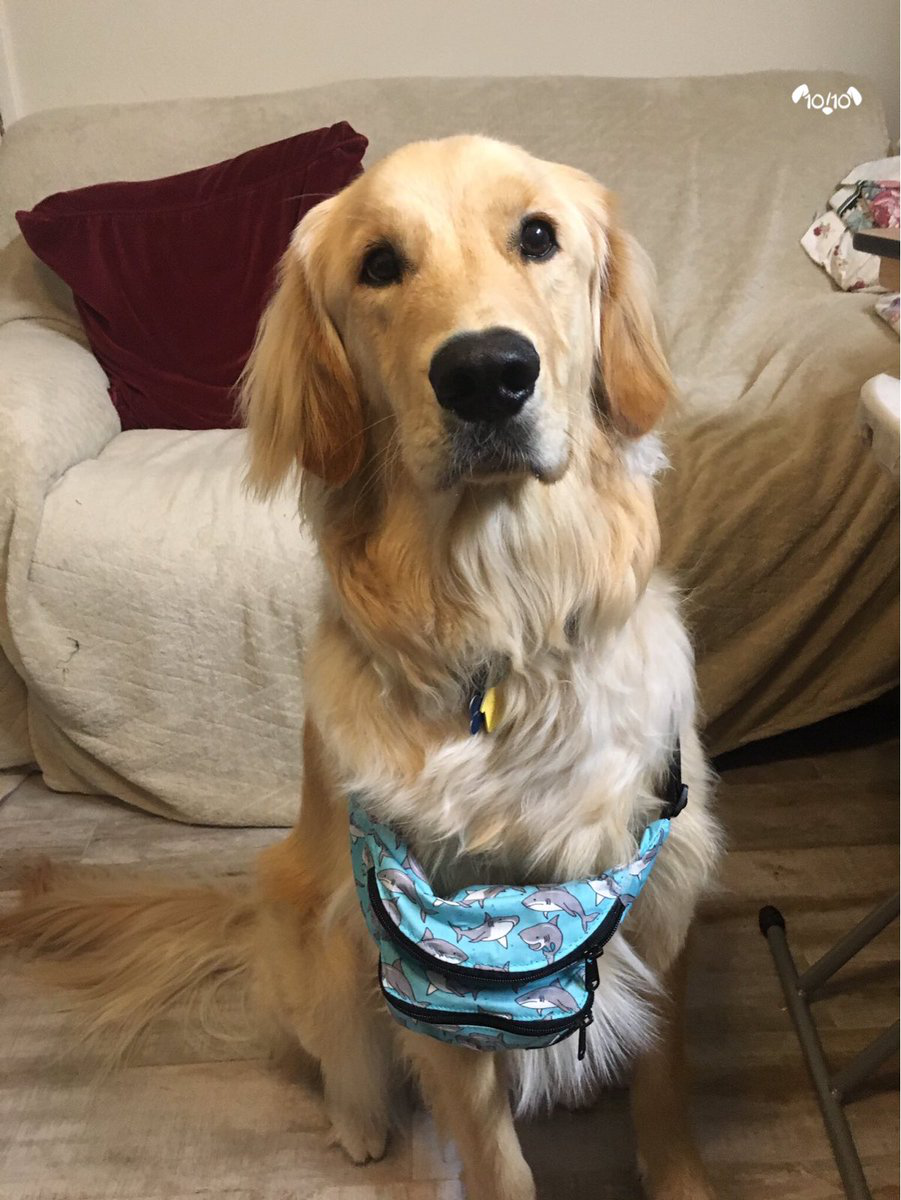

In [63]:
golden_retriever = twitter_archive_master[twitter_archive_master['dog_type'] == 'golden_retriever']['jpg_url'].values[0]
response = requests.get(golden_retriever)
print('One of the most popular dog')
Image.open(BytesIO(response.content))

In [64]:
counts = ['retweet_count', 'favorite_count']
sum_count = twitter_archive_master.groupby(['dog_type'])['retweet_count', 'favorite_count'].sum().sort_values(by=counts, ascending=False)
sum_count

<ipython-input-64-2aafc70c5a2a>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sum_count = twitter_archive_master.groupby(['dog_type'])['retweet_count', 'favorite_count'].sum().sort_values(by=counts, ascending=False)


,retweet_count,favorite_count
dog_type,,
golden_retriever,483833,1681869
Labrador_retriever,322538,1023817
Pembroke,251702,942916
Chihuahua,199845,641301
Samoyed,158874,480634
...,...,...
groenendael,363,1727
corn,342,1052
hyena,273,1285


> The most common type in WeRateDogs is Golden Retriever and it has the most retweet count and favorite count among the all.

> But for the average of retweet and favourite count, the most count is House Finch. The Golden Retriever event not in top 10 of the list.


In [65]:
mean_count = twitter_archive_master.groupby(['dog_type'])['retweet_count', 'favorite_count'].mean().sort_values(by=counts, ascending=False)
mean_count.head(10)

<ipython-input-65-20b93dbab5ee>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_count = twitter_archive_master.groupby(['dog_type'])['retweet_count', 'favorite_count'].mean().sort_values(by=counts, ascending=False)


,retweet_count,favorite_count
dog_type,,
house_finch,35006.000000,75477.000000
leafhopper,30004.000000,74161.000000
oscilloscope,12614.000000,27701.000000
Bedlington_terrier,7225.500000,22790.833333
standard_poodle,5200.625000,13054.250000
Afghan_hound,5156.666667,15630.000000
Eskimo_dog,4772.578947,13361.894737
English_springer,4725.300000,12878.000000
academic_gown,4593.000000,19207.000000


### Dog type rating

In [66]:
# First, we need make new column, which is rating for each post
numerator = twitter_archive_master.rating_numerator
denominator = twitter_archive_master.rating_denominator
twitter_archive_master['rating'] = numerator / denominator
twitter_archive_master

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,dog_type,p_conf,retweet_count,favorite_count,rating
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,NaN,7604,35884,1.3
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,5631,30943,1.3
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,3726,23295,1.2
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,NaN,NaN,7773,39140,1.3
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,8378,37390,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1974,666049248165822465,2015-11-16 00:24:50,Here we have a 1949 1st generation vulpix. Enj...,5.0,10.0,NaN,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,40,96,0.5
1975,666044226329800704,2015-11-16 00:04:52,This is a purebred Piers Morgan. Loves to Netf...,6.0,10.0,a,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,130,269,0.6
1976,666033412701032449,2015-11-15 23:21:54,Here is a very happy pup. Big fan of well-main...,9.0,10.0,a,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,41,111,0.9
1977,666029285002620928,2015-11-15 23:05:30,This is a western brown Mitsubishi terrier. Up...,7.0,10.0,a,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,42,120,0.7


#### Most and lowest rate

In [67]:
rating = twitter_archive_master.groupby(['dog_type']).sum().sort_values(by=['rating'], ascending=False)
rating[['rating_numerator', 'rating_denominator', 'rating']]

,rating_numerator,rating_denominator,rating
dog_type,,,
golden_retriever,1918.5,1661.0,169.768182
Labrador_retriever,1352.0,1220.0,108.800000
Pembroke,1059.0,930.0,105.900000
Chihuahua,899.0,840.0,89.900000
pug,565.0,550.0,56.500000
...,...,...,...
mosquito_net,8.0,10.0,0.800000
ram,7.0,10.0,0.700000
sunglasses,6.0,10.0,0.600000


One of the least rated dog


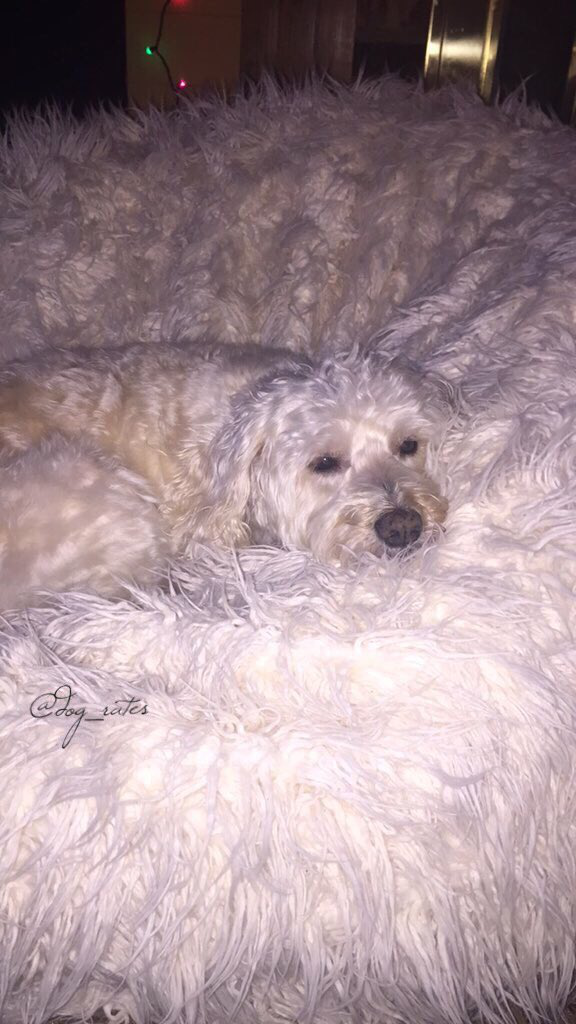

In [68]:
loggerhead = twitter_archive_master[twitter_archive_master['dog_type'] == 'loggerhead']['jpg_url'].values[0]
response = requests.get(loggerhead)
print('One of the least rated dog')
Image.open(BytesIO(response.content))

In [69]:
print(f"The most rated dog is {rating.iloc[0].name} with rate {rating.iloc[0]['rating']}")
print(f"The lowest rated dog is {rating.iloc[-1].name} with rate {rating.iloc[-1]['rating']}")

The most rated dog is golden_retriever with rate 169.76818181818166
The lowest rated dog is loggerhead with rate 0.3


In [70]:
twitter_archive_master.sort_values(by='rating', ascending=False)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,dog_type,p_conf,retweet_count,favorite_count,rating
714,749981277374128128,2016-07-04 15:00:45,This is Atticus. He's quite simply America af....,1776.0,10.0,Atticus,NaN,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,NaN,NaN,2444,5090,177.6
1703,670842764863651840,2015-11-29 05:52:33,After so many requests... here you go.\n\nGood...,420.0,10.0,NaN,NaN,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,NaN,NaN,8210,23516,42.0
542,778027034220126208,2016-09-20 00:24:34,This is Sophie. She's a Jubilant Bush Pupper. ...,27.0,10.0,Sophie,NaN,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,clumber,0.946718,1618,6578,2.7
560,774314403806253056,2016-09-09 18:31:54,I WAS SENT THE ACTUAL DOG IN THE PROFILE PIC B...,14.0,10.0,NaN,NaN,https://pbs.twimg.com/media/Cr7q1VxWIAA5Nm7.jpg,Eskimo_dog,0.596045,5532,21834,1.4
152,854120357044912130,2017-04-17 23:52:16,Sometimes you guys remind me just how impactfu...,14.0,10.0,NaN,pupper,https://pbs.twimg.com/media/C9px7jyVwAAnmwN.jpg,black-and-tan_coonhound,0.854861,7149,30946,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,675153376133427200,2015-12-11 03:21:23,What kind of person sends in a picture without...,1.0,10.0,NaN,NaN,https://pbs.twimg.com/media/CV6gaUUWEAAnETq.jpg,NaN,NaN,2471,6006,0.1
1885,667549055577362432,2015-11-20 03:44:31,Never seen dog like this. Breathes heavy. Tilt...,1.0,10.0,NaN,NaN,https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg,NaN,NaN,2113,5485,0.1
744,746906459439529985,2016-06-26 03:22:31,"PUPDATE: can't see any. Even if I could, I cou...",0.0,10.0,NaN,NaN,https://pbs.twimg.com/media/Cl2LdofXEAATl7x.jpg,NaN,NaN,293,2874,0.0
230,835152434251116546,2017-02-24 15:40:31,When you're so blinded by your systematic plag...,0.0,10.0,NaN,NaN,https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg,American_Staffordshire_terrier,0.012731,2987,22268,0.0


#### Most and lowest  average rate

In [71]:
avg_rating = twitter_archive_master.groupby(['dog_type']).mean().sort_values(by=['rating'], ascending=False)
avg_rating['avg_rating'] = avg_rating['rating']
avg_rating[['rating_numerator', 'rating_denominator', 'avg_rating']]

,rating_numerator,rating_denominator,avg_rating
dog_type,,,
clumber,27.0,10.0,2.7
oxygen_mask,13.0,10.0,1.3
timber_wolf,13.0,10.0,1.3
racket,13.0,10.0,1.3
house_finch,13.0,10.0,1.3
...,...,...,...
plow,8.0,10.0,0.8
ram,7.0,10.0,0.7
sunglasses,6.0,10.0,0.6


In [72]:
print(f"The most average rated dog is {avg_rating.iloc[0].name} with average rate {avg_rating.iloc[0]['rating']}")
print(f"The lowest average rated dog is {avg_rating.iloc[-1].name} with average rate {avg_rating.iloc[-1]['rating']}")

The most average rated dog is clumber with average rate 2.7
The lowest average rated dog is loggerhead with average rate 0.3


One of the least rated dog
Sophie


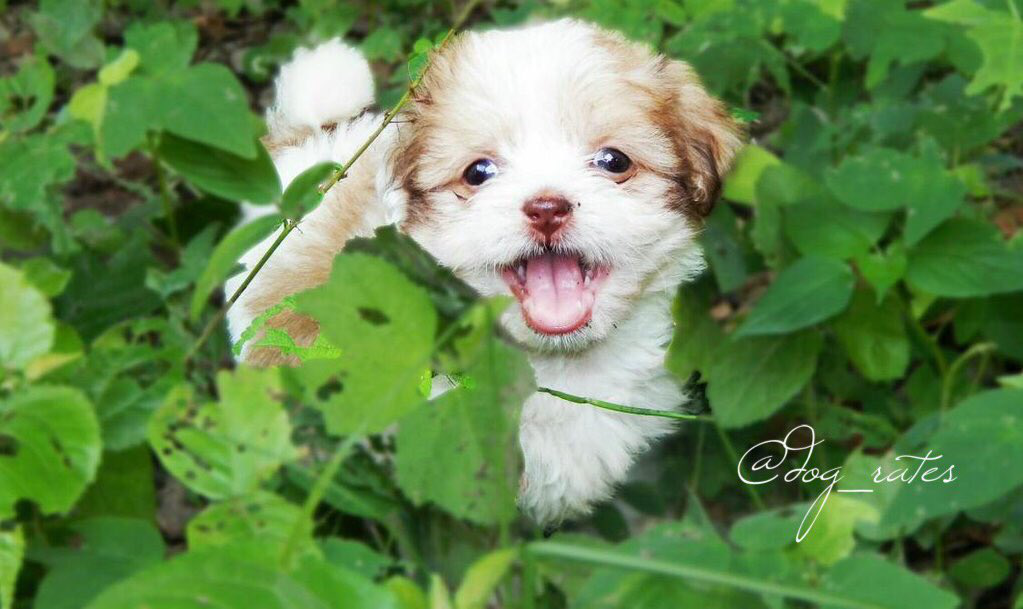

In [73]:
clumber = twitter_archive_master[twitter_archive_master['dog_type'] == 'clumber']['jpg_url'].values[0]
response = requests.get(clumber)
print('One of the least rated dog')
print(twitter_archive_master[twitter_archive_master['dog_type'] == 'clumber']['name'].values[0])
Image.open(BytesIO(response.content))

### Correlation between each columns

In [74]:
twitter_archive_master.corr()

,rating_numerator,rating_denominator,p_conf,retweet_count,favorite_count,rating
rating_numerator,1.000000,0.197447,0.020805,0.018319,0.016119,0.980054
rating_denominator,0.197447,1.000000,-0.010608,-0.019246,-0.026733,-0.000924
p_conf,0.020805,-0.010608,1.000000,0.032842,0.065554,0.140406
retweet_count,0.018319,-0.019246,0.032842,1.000000,0.925425,0.022503
favorite_count,0.016119,-0.026733,0.065554,0.925425,1.000000,0.021721
rating,0.980054,-0.000924,0.140406,0.022503,0.021721,1.000000


0.9254252213316151


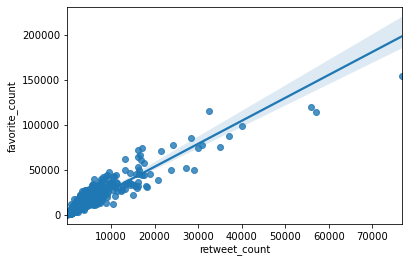

In [75]:
print(twitter_archive_master.retweet_count.corr(twitter_archive_master.favorite_count))
sns.regplot(twitter_archive_master.retweet_count, twitter_archive_master.favorite_count);

In [76]:
twitter_archive_master.retweet_count.corr(twitter_archive_master.favorite_count)

0.9254252213316151

> From the table and regression plot above, retweet_count and favorite_count have strong positive correlation.

# Reference

* [String contain regex](https://stackoverflow.com/questions/9012008/pythons-re-return-true-if-string-contains-regex-pattern)
* [Join multiple dataframes in Pandas](https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns)